# Weather Analysis

### Step 1: Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Step 2: Database Connection Details

In [2]:
DB_USER = 'postgres'
DB_PASSWORD = 'postgres'
DB_HOST = 'postgres'
DB_PORT = '5432'
DB_NAME = 'tomorrow'
TABLE_NAME = 'weather_reports.weather_report_daily'

### Step 3 Location Details

In [3]:
location = '25.9000,-97.5200'

### Step 4: Create Database Engine and Read Data from PostgreSQL

In [4]:
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')


query = f"SELECT * FROM {TABLE_NAME} WHERE lat = '{location.split(',')[0]}' and lon='{location.split(',')[1]}'"

# Load data into a pandas DataFrame
data = pd.read_sql(query, engine)

### Step 4: Convert the Timestamp Column to Datetime

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp')
data['date_hour'] = data['timestamp'].dt.strftime('%Y-%m-%d %H:%M')


### Step 5: Plot Each Column as a Time Series

##### Temperature

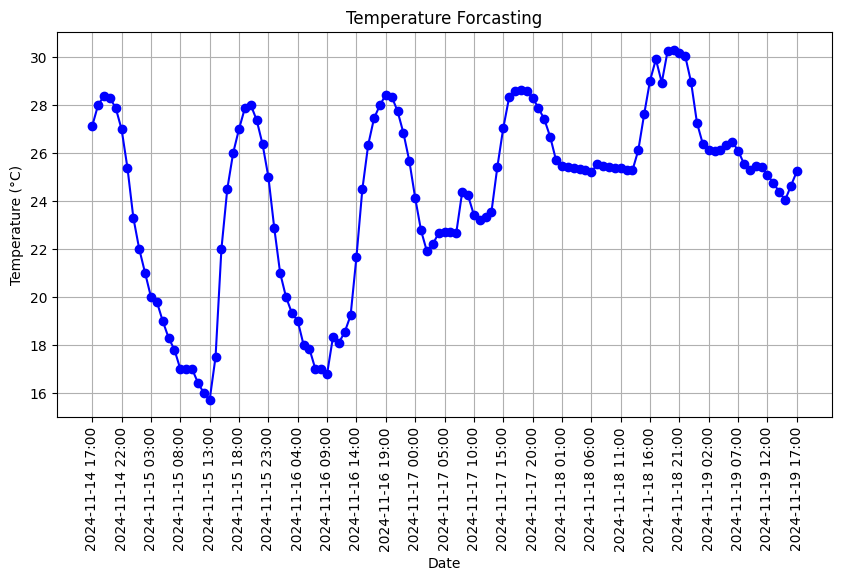

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['temperature'] , marker='o', color='b')
plt.title('Temperature Forcasting')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()



##### Feels Like

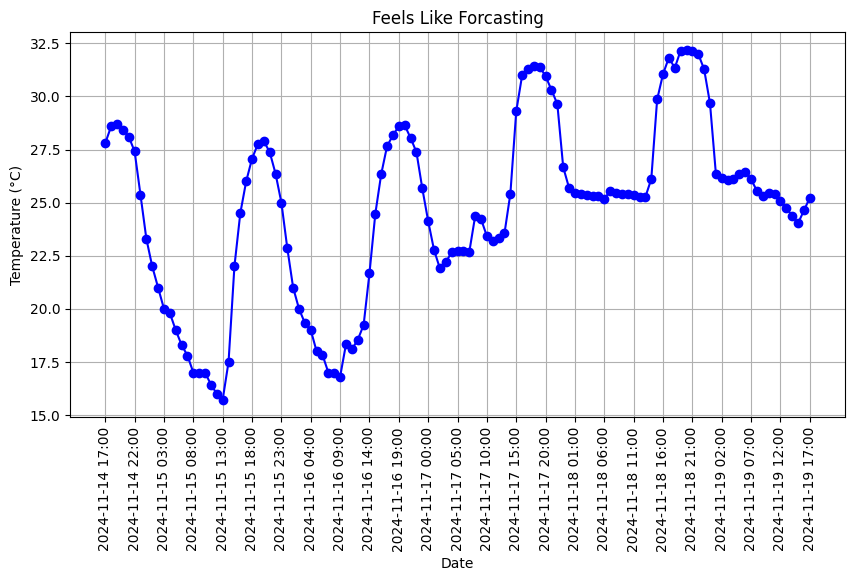

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['feels_like'] , marker='o', color='b')
plt.title('Feels Like Forcasting')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()

##### Wind Speed

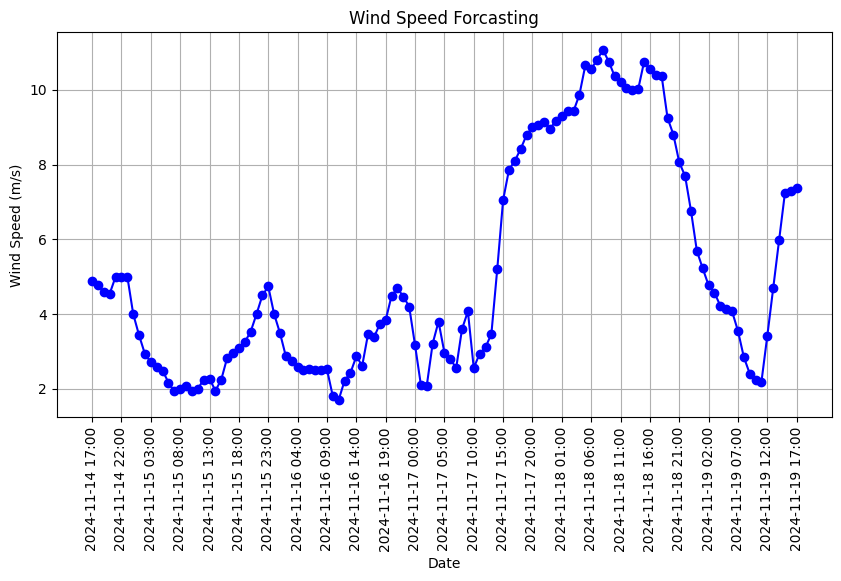

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['wind_speed'] , marker='o', color='b')
plt.title('Wind Speed Forcasting')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()

##### Humidity

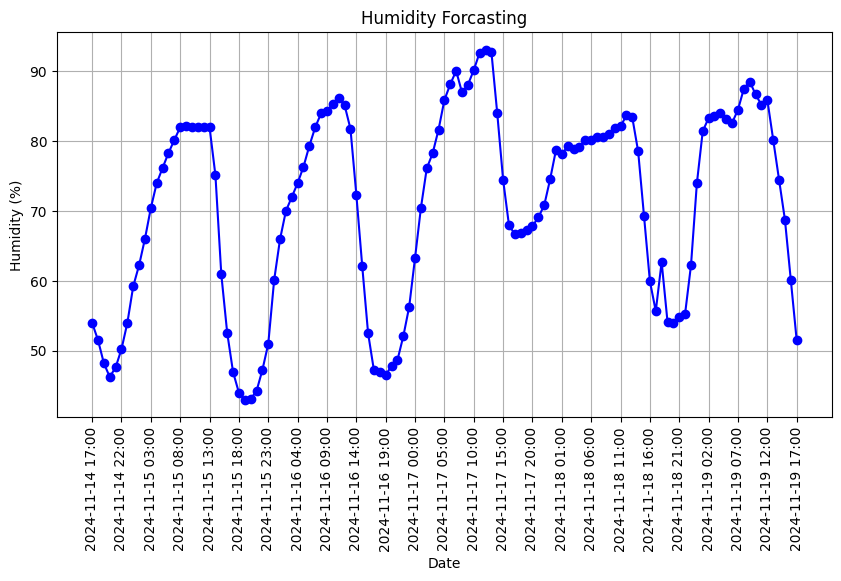

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['humidity'] , marker='o', color='b')
plt.title('Humidity Forcasting')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()

##### Rain 

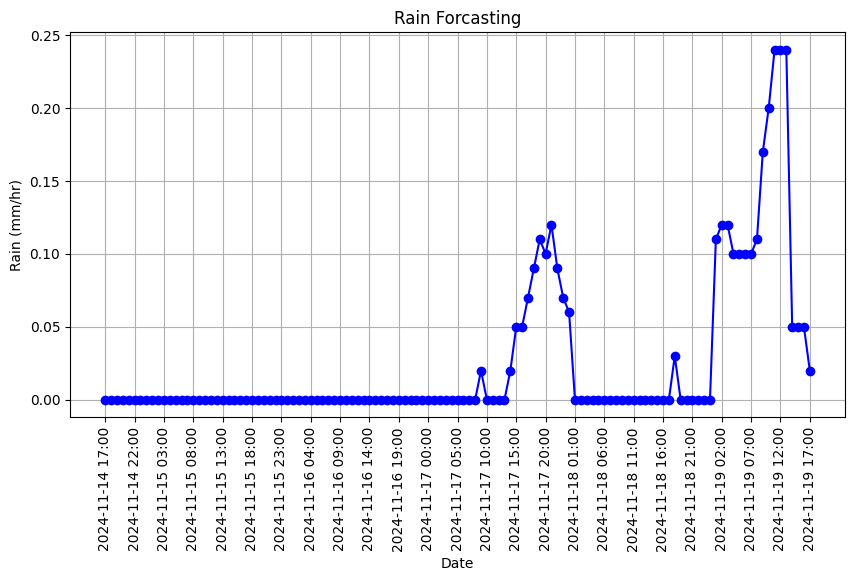

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['rain_intensity'] , marker='o', color='b')
plt.title('Rain Forcasting')
plt.xlabel('Date')
plt.ylabel('Rain (mm/hr)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()

##### Snow

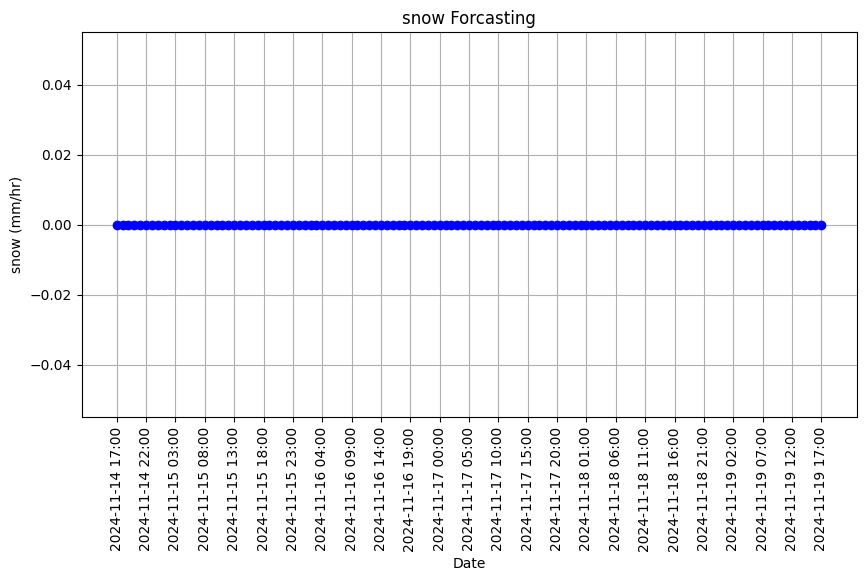

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['snow_intensity'] , marker='o', color='b')
plt.title('snow Forcasting')
plt.xlabel('Date')
plt.ylabel('snow (mm/hr)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()

##### Cloud Cover

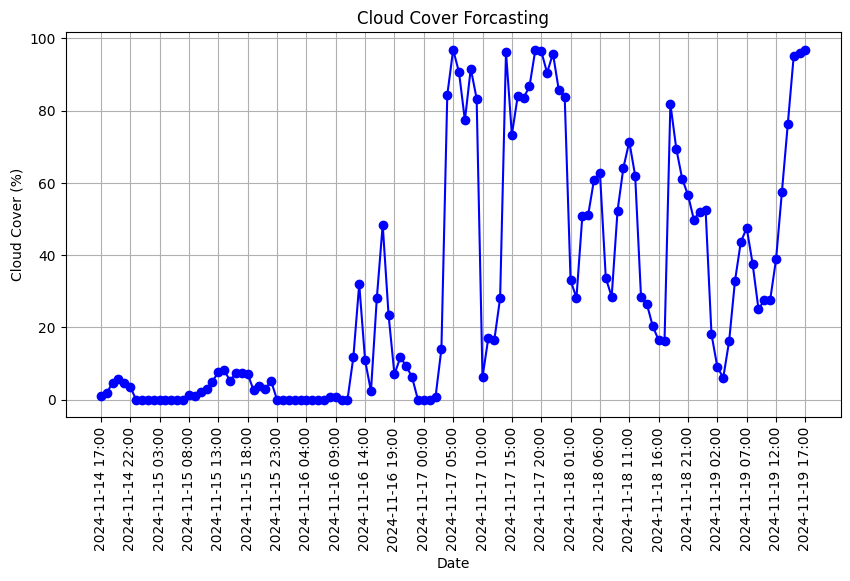

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(data['date_hour'], data['cloud_cover'] , marker='o', color='b')
plt.title('Cloud Cover Forcasting')
plt.xlabel('Date')
plt.ylabel('Cloud Cover (%)')
plt.xticks(ticks=range(0,len(data),5),labels=data['date_hour'][::5],rotation=90)
plt.grid (True)
plt.show()